# Lab 3

# Problem 1: Ridge Regression and Co-linearity.

2
. What is the test error of the “zero-variance” solution, namely, the all-zeros solution?


In [16]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [17]:
n_samples, n_features = 100, 200
X = np.random.randn(n_samples, n_features)

coef = np.ones(n_features)
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal((n_samples,))

In [22]:
test_error = (np.dot(y.T, y))
print(test_error)

20477.138457707333


3
. The least-squares solution does not seem to do too well, because it has so much variance. Still, it is unbiased. Show this empirically: generate many copies of the data, and for each one, obtain the least-squares solution. Average these, to show that while each run produces a beta hat that is very different, their average begins to look more and more like the true beta.

In [46]:
def average(vec1, vec2=[], iterations=2):
    if len(vec2) == 0:
        return vec1
    if len(vec1) != len(vec2):
        return 0
    
    average_vec = []
    
    for i in range(0, len(vec1)):
        average_vec.append((vec1[i] + vec2[i])/iterations)
        
    return average_vec

In [58]:
def append_multiarrays(arr1, arr2):
    if len(arr1) == 0:
        return arr2
    for i in range(0, len(arr2)):
        arr1 = np.vstack([arr1, arr2[i, :]])
        
    return arr1

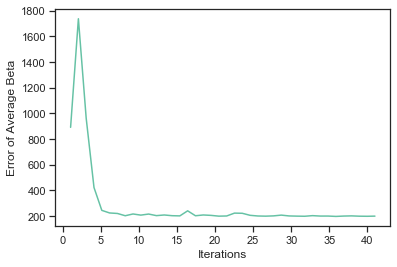

In [61]:
beta_average = []
errors = []
epochs = 40

X_Combined = []
y_Combined = []

for iteration in range(0, epochs):
    
    X = np.random.randn(n_samples, n_features)
    X_Combined = append_multiarrays(X_Combined, X)
    
    y += 0.01 * np.random.normal((n_samples,))
    y_Combined = np.concatenate((y_Combined, y), axis=None)

    beta_hat = linear_model.LinearRegression().fit(X, y).coef_
    
    if iteration != 0:
        beta_average = average(beta_average, beta_hat, iteration)
    else:
        beta_average = beta_hat
        
        
    error_vector = beta_average - coef
    errors.append(np.linalg.norm(error_vector, ord=2)**2)
    

iterations = np.linspace(1, epochs + 1, num=epochs)
plt.plot(iterations, errors)
plt.xlabel("Iterations")
plt.ylabel("Error of Average Beta")
plt.show()

4.
Alternatively, if one had access to lots of data, instead of computing the least-square solution over smaller batches and then averaging these solutions as in the previous part of the problem, an approach is to run a single least-squares regression over all the data. Which approach do you think is better? Can you support your conclusion with experiments?


If speed is the priority, the batch regression would be preferred if X is large, i.e. we have a lot of samples. This is because of the huge time complexity of matrix multiplication, transposition, and inversion. 

If accuracy is the priority, the single LSR is preferred. I test this by comparing the error of the previous question with the error of a single LSR.

In [62]:
beta_hat = linear_model.LinearRegression().fit(X_Combined, y_Combined).coef_
error_vector = beta_hat - coef
print(np.linalg.norm(error_vector, ord=2)**2)

232.75121141742798


This shows that the error is much smaller with the single LSR.